In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.integrate import quad
from math import sqrt,pow,log
import pandas as pd
from matplotlib.pyplot import figure
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from scipy.optimize import curve_fit
plt.style.use('/root/Github_Repos/HubbleConstant-ConstraintsForVCG/standard.mplstyle')

Importing data

In [19]:
!wget http://supernova.lbl.gov/Union/figures/SCPUnion2.1_mu_vs_z.txt
d = np.genfromtxt('SCPUnion2.1_mu_vs_z.txt')
z = d.T[1]
dm = d.T[2]
errdm= d.T[3]
dldataSN=np.zeros(len(z))
error= np.zeros(len(z))
dlerror= np.zeros(len(z))
c=f=e=0

for (i,j) in zip(dm,errdm):   
  error[f]+= 10**((i+j)/5+1)/10**6
  f+=1

dlabel = 'SCP_2.1'
label = {"Z_SN":z,"DMdata_SN":dm,"Error_DM_SN":errdm}
data_SN=pd.DataFrame(label)
for i in data_SN.DMdata_SN:
  dldataSN[c]+=10**((i/5)+1)/1000000
  c=c+1
for (i,j) in zip(dldataSN,error):
    dlerror[e]+=j-i
    e+=1
data_SN["dLdata_SN"]=dldataSN
data_SN["Error_DL_SN"]=dlerror
print(data_SN)
len(z)


URL transformed to HTTPS due to an HSTS policy
--2021-12-03 01:08:36--  https://supernova.lbl.gov/Union/figures/SCPUnion2.1_mu_vs_z.txt
Resolving supernova.lbl.gov (supernova.lbl.gov)... 128.3.28.88
Connecting to supernova.lbl.gov (supernova.lbl.gov)|128.3.28.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33899 (33K) [text/plain]
Saving to: ‘SCPUnion2.1_mu_vs_z.txt.6’

SCPUnion2.1_mu_vs_z 100%[===================>]  33.10K  95.9KB/s    in 0.3s    

2021-12-03 01:08:38 (95.9 KB/s) - ‘SCPUnion2.1_mu_vs_z.txt.6’ saved [33899/33899]

         Z_SN  DMdata_SN  Error_DM_SN     dLdata_SN  Error_DL_SN
0    0.028488  35.346583     0.223906    117.305042    12.741218
1    0.050043  36.682368     0.166829    217.006920    17.329264
2    0.052926  36.817691     0.155756    230.960787    17.175017
3    0.070086  37.446737     0.158467    308.565458    23.360101
4    0.062668  37.483409     0.156099    313.820905    23.390114
..        ...        ...          ...       

580

PARAMETER Definition (Hubble Parameter, Energy density of Radiation (r0) and Baryonic Matter (b0), in the current epoch)

In [3]:
def defineparam():
  global omega_r0
  omega_r0 = float(input("Omega R0: "))
  global omega_b0
  omega_b0 = float(input("Omega B0: "))
defineparam()

Omega R0: .0000245
Omega B0: .02


Defining the function to find luminosity distance and followed by calculating the luminosity distance through integration by quad function of the scipy module for different combination of Omega M and n and from that the distance modulus.  

In [4]:
def int_func(redshift):
      return 1/((pow((1+redshift),2)*(omega_r0+(omega_b0/(1+redshift))+((1-omega_b0-omega_r0)*((omega_m*(1+redshift)**6)+(1-omega_m)*(1+redshift)**n)**(0.5)/(1+redshift)**(4)))**(0.5)))

In [5]:

H0 = np.zeros(len(z))

H0error= np.zeros(len(z))
omega_m=0.09
n=1.4545
a=b=c=d=e=0
# Distance luminosity from data in Mpc

# DL theoretical from VCG model
for redshift in data_SN.Z_SN:
  g = quad(int_func,0,redshift)
  H0[a]+=(1+redshift)*g[0]*(300000/data_SN.dLdata_SN[a]) 
  a=a+1


# Calculating error bars of DL


for redshift in data_SN.Z_SN:
  g = quad(int_func,0,redshift)
  H0error[b]+=(data_SN.Error_DL_SN[b]/(data_SN.dLdata_SN[b] + data_SN.Error_DL_SN[b]))*(1+redshift)*g[0]*(300000/data_SN.dLdata_SN[b])
  b=b+1
data_SN["H0"]=H0
data_SN["H0error"] = H0error
%time

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


The Table has the Distance Modulus observed (DM) and the Distance Modulus calculated by Chaplygin Model 

In [6]:
print(data_SN)

         Z_SN  DMdata_SN  Error_DM_SN     dLdata_SN  Error_DL_SN         H0  \
0    0.028488  35.346583     0.223906    117.305042    12.741218  74.414960   
1    0.050043  36.682368     0.166829    217.006920    17.329264  71.766821   
2    0.052926  36.817691     0.155756    230.960787    17.175017  71.461536   
3    0.070086  37.446737     0.158467    308.565458    23.360101  71.687378   
4    0.062668  37.483409     0.156099    313.820905    23.390114  62.701957   
..        ...        ...          ...           ...          ...        ...   
575  1.017000  44.293971     0.171046   7224.273081   592.065888  66.083190   
576  1.315000  44.971358     0.187509   9868.963776   890.071285  66.572554   
577  0.821000  43.640939     0.194014   5347.955161   499.817435  68.413900   
578  1.215000  45.246521     0.560317  11202.222383  3297.766823  53.166371   
579  0.623000  42.514524     0.241428   3183.499599   374.373277  81.755545   

       H0error  
0     7.290769  
1     5.307188  


In [8]:
sort_data_SN=data_SN.sort_values(by=['Z_SN'])
sort_data_SN

,Z_SN,DMdata_SN,Error_DM_SN,dLdata_SN,Error_DL_SN,H0,H0error
50,0.015000,34.163504,0.161453,68.030048,5.250946,66.895075,4.793363
148,0.015000,34.111411,0.213389,66.417449,6.858249,68.519270,6.413071
132,0.015000,34.379773,0.217349,75.154426,7.911760,60.553654,5.767521
159,0.015027,33.950192,0.178117,61.664938,5.271362,73.934578,5.822490
139,0.015100,34.525875,0.213682,80.385008,8.312515,56.995135,5.341445
...,...,...,...,...,...,...,...
557,1.340000,45.067506,0.275015,10315.757309,1392.820190,65.193360,7.755223
570,1.350000,44.827065,0.185705,9234.493829,824.491572,73.500818,6.024545
533,1.370000,45.049713,0.262748,10231.579187,1316.037508,67.557498,7.699269
537,1.390000,44.876234,0.250632,9445.976658,1155.668427,74.501039,8.121239


In [1]:
a=0
e = np.repeat(100, len(z))
INT=np.zeros(len(z))
def func(x,m):
    return x/m
for redshift in data_SN.Z_SN:
  g = quad(int_func,0,redshift)
  INT[a]+=(1+redshift)*g[0]*(300000) 
  a=a+1
popt, pcov=curve_fit(func,INT,data_SN.dLdata_SN,sigma=sort_data_SN.Error_DL_SN)
p=format(popt[0],'.4f')
err=pcov[0]**.5
err1=format(err[0],'.4f')
f=popt*data_SN.dLdata_SN
plt.xlabel("Distance Luminosity")
plt.ylabel("INTEGERATION Value")
plt.title("Supernova - Hubble Constant")
plt.scatter(data_SN.dLdata_SN,INT,color='green')
plt.errorbar(data_SN.dLdata_SN,INT,xerr=sort_data_SN.Error_DL_SN,fmt=' ',ecolor='black', label='error')
plt.plot(data_SN.dLdata_SN,f,color='red')
plt.text(-3500,700000,"Slope: "+str(p)+"+/-"+str(err1))
plt.show()

NameError: name 'np' is not defined

findfont: Font family ['Times'] not found. Falling back to DejaVu Sans.


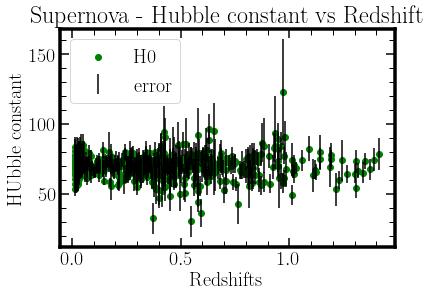

In [10]:
plt.xlabel("Redshifts")
plt.ylabel("HUbble constant")
plt.title("Supernova - Hubble constant vs Redshift")
plt.scatter(sort_data_SN.Z_SN,sort_data_SN.H0,color='green',label='H0')
plt.errorbar(sort_data_SN.Z_SN,sort_data_SN.H0,yerr=sort_data_SN.H0error,fmt=' ',ecolor='black', label='error')
plt.legend(loc='best')
plt.show()

In [11]:
name=np.array(['GW190521','GW190706_222641','GW190413_134308','GW190514_065416','GW190719_215514','GW190521',"GW190909_114149","GW190413_052954",'GW190803_022701','GW190731_140936','GW190727_060333','GW190620_030421','GW190421_213856','GW170729','GW190602_175927','GW190527_092055','GW190519_153544','GW190424_180648','GW190929_012149','GW190828_063405','GW190701_203306','GW190513_205428','GW170823','GW190517_055101','GW190915_235702','GW190828_065509','GW190408_181802','GW190910_112807','GW190512_180714','GW190503_185404','GW190521_074359','GW170818','GW151012','GW170809','GW170104','GW190728_064510','GW190708_232457','GW190630_185205','GW190720_000836','GW190707_093326','GW190930_133541','GW190412','GW190924_021846','GW170814','GW151226','GW150914','GW190426_152155','GW200115_042309','GW170608','GW200105_162426','GW190814','GW190425','GW170817'])
full_DL_GW=np.array([[5300.0,2400,-2600],[4420.0,2590,-1930],[4450,2480,-2120],[4130.0,2650,-2170],[3940.0,2590,-2000],[3920.0,2190,-1950],[3770.0,3270,-2220],[3550.0,2270,-1660],[3270.0,1950,-1580],[3300.0,2390,-1720],[3300.0,1540,-1500],[2810.0,1680,-1310],[2880.0,1370,-1380],[2840.0,1400,-1360],[2690.0,1790,-1120],[2490.0,2480,-1240],[2530.0,1830,-920],[2200.0,1580,-1160],[2130.0,3650,-1050],[2130.0,660,-930],[2060.0,760,-730],[2060.0,880,-800],[1940.0,970,-900],[1860.0,1620,-840],[1620.0,710,-610],[1600.0,620,-600],[1550.0,400,-600],[1460.0,1030,-580],[1430.0,550,-550],[1450.0,690,-630],[1240.0,400,-570],[1060.0,420,-380],[1080.0,550,-490],[1030.0,320,-390],[990.0,440,-430],[870.0,260,-370],[880.0,330,-390],[890.0,560,-370],[790.0,690,-320],[770.0,380,-370],[760.0,360,-320],[740.0,140,-170],[570.0,220,-220],[600.0,150,-220],[450.0,180,-190],[440.0,150,-170],[370.0,180,-160],[300.0,150,-100],[320.0,120,-110],[280.0,110,-110],[241.0,41,-45],[159.0,69,-72],[40.0,7,-15]])
full_Z_GW=np.array([[0.82,0.28,-0.34],[0.71,0.32,-0.27],[0.71,0.31,-0.30],[0.67,0.33,-0.31],[0.64,0.33,-0.29],[0.64,0.28,-0.28],[0.62,0.41,-0.33],[0.59,0.29,-0.24],[0.55,0.26,-0.24],[0.55,0.31,-0.26],[0.55,0.21,-0.22],[0.49,0.23,-0.20],[0.49,0.19,-0.21],[0.49,0.19,-0.21],[0.47,0.25,-0.17],[0.44,0.34,-0.20],[0.44,0.25,-0.14],[0.39,0.23,-0.19],[0.38,0.49,-0.17],[0.38,0.10,-0.15],[0.37,0.11,-0.12],[0.37,0.13,-0.13],[0.35,0.15,-0.15],[0.34,0.24,-0.14],[0.3,0.11,-0.10],[0.3,0.10,-0.10],[0.29,0.06,-0.10],[0.28,0.16,-0.10],[0.27,0.09,-0.10],[0.27,0.11,-0.11],[0.24,0.07,-0.10],[0.21,0.07,-0.07],[0.21,0.09,-0.09],[0.2,0.05,-0.07],[0.2,0.08,-0.08],[0.18,0.05,-0.07],[0.18,0.06,-0.07],[0.18,0.10,-0.07],[0.16,0.12,-0.06],[0.16,0.07,-0.07],[0.15,0.06,-0.06],[0.15,0.03,-0.03],[0.12,0.04,-0.04],[0.12,0.03,-0.04],[0.09,0.04,-0.04],[0.09,0.03,-0.03],[0.08,0.04,-0.03],[0.07,0.03,-0.02],[0.07,0.02,-0.02],[0.06,0.02,-0.02],[0.053,0.009,-0.010],[0.04,0.01,-0.02],[0.01,0.00,-0.00]])
# Number of events
a=name.size

#Defining arrays
dldata_GW=np.zeros(a)
dlUP=np.zeros(a)
dlLOW=np.zeros(a)
dlTOP=np.zeros(a)
dlBOTTOM=np.zeros(a)
dmtop=np.zeros(a)
dmbottom=np.zeros(a)
Z_GW=np.zeros(a)
dmth_GW=np.zeros(a)
dmdata_GW=np.zeros(a)
dlth_GW = np.zeros(a)
dmtoperr=np.zeros(a)
dmbottomerr=np.zeros(a)
#defining variables for index of the above arrays
b=c=d=e=f=h=k=l=m=x=y=p=q=r=s=0
#extracting redshifts and DL from the full data
for i in full_Z_GW:
  Z_GW[e]+=i[0]
  e+=1
for i in full_DL_GW:
  dldata_GW[b]+=i[0]
  b+=1
#Upper and Lower limit of DL from data
for i in full_DL_GW:
  dlUP[c]+=i[0]+i[1]
  c+=1
for i in full_DL_GW:
  dlLOW[d]+=i[0]+i[2]
  d+=1
# Calculating upper and lower limit of Distance modulus from DL limits calculated above

#Calculating differences in DL from its limits
for (i,j) in zip(dldata_GW,dlUP):
  dlTOP[x]+=j-i
  x+=1
for (i,j) in zip(dldata_GW,dlLOW):
  dlBOTTOM[y]=i-j
  y+=1


# DL-h1 < DL < DL+h2,if h1<h2, take error to be h1 or vice versa
#new_error=np.zeros(a)
#for (i,j) in zip(dlTOP,dlBOTTOM):
 # if i<j:
#    new_error[p]+=i
#    p+=1
#  elif j<i:
#    new_error[q]+=j
 #   q+=1


#for (i,j) in zip(dmtoperr,dmbottomerr):
#  if i<j:
 #  new_error[p]+=i
  # p+=1
#  elif j<i:
 #  new_error[q]+=j
  # q+=1

label1 = {"Event_Name":name,"Z_GW":Z_GW,"dLdata_GW":dldata_GW,"DL_Uplimit": dlUP, "DL_Lowlimit": dlLOW,"DL_UP_Error":dlTOP,"DL_LOW_Error":dlBOTTOM}
data_GW=pd.DataFrame(label1)
#data_GW.to_excel(excel_writer = "/root/Github_Repos/VCG_GW/GWTColdGW.xlsx")

In [12]:
print(data_GW)

         Event_Name   Z_GW  dLdata_GW  DL_Uplimit  DL_Lowlimit  DL_UP_Error  \
0          GW190521  0.820     5300.0      7700.0       2700.0       2400.0   
1   GW190706_222641  0.710     4420.0      7010.0       2490.0       2590.0   
2   GW190413_134308  0.710     4450.0      6930.0       2330.0       2480.0   
3   GW190514_065416  0.670     4130.0      6780.0       1960.0       2650.0   
4   GW190719_215514  0.640     3940.0      6530.0       1940.0       2590.0   
5          GW190521  0.640     3920.0      6110.0       1970.0       2190.0   
6   GW190909_114149  0.620     3770.0      7040.0       1550.0       3270.0   
7   GW190413_052954  0.590     3550.0      5820.0       1890.0       2270.0   
8   GW190803_022701  0.550     3270.0      5220.0       1690.0       1950.0   
9   GW190731_140936  0.550     3300.0      5690.0       1580.0       2390.0   
10  GW190727_060333  0.550     3300.0      4840.0       1800.0       1540.0   
11  GW190620_030421  0.490     2810.0      4490.0   

In [14]:
data_GWTC3 = pd.read_excel (r'/root/Github_Repos/VCG_GW/oldGW.xlsx')
data_GWTC3.index= np.arange(53,88)
print(data_GWTC3)

            Event_Name_GWTC3  luminosity_distance  luminosity_distance_lower  \
53        GW191103_012549-v1                  990                        520   
54        GW191105_143521-v1                 1150                        670   
55        GW191109_010717-v1                 1290                        640   
56        GW191113_071753-v1                 1370                        750   
57        GW191126_115259-v1                 1620                        880   
58        GW191127_050227-v1                 3400                       1500   
59        GW191129_134029-v1                  790                        460   
60        GW191204_110529-v1                 1800                        700   
61        GW191204_171526-v1                  650                        400   
62        GW191215_223052-v1                 1930                       1070   
63        GW191216_213338-v1                  340                        210   
64        GW191219_163120-v1            

In [15]:
mucollect=[data_GW.Z_GW,data_GWTC3.redshift]
finalredshift = pd.concat(mucollect)

namecollect=[data_GW.Event_Name,data_GWTC3.Event_Name_GWTC3]
finalevents = pd.concat(namecollect)

dlcollect=[data_GW.dLdata_GW,data_GWTC3.luminosity_distance]
finaldl = pd.concat(dlcollect)

dlupcollect=[data_GW.DL_Uplimit,data_GWTC3.luminosity_distance_upper]
finaldlup = pd.concat(dlupcollect)

dllowcollect=[data_GW.DL_Lowlimit,data_GWTC3.luminosity_distance_lower]
finaldllow = pd.concat(dllowcollect)

label2 = {"Fin_Event_Name":finalevents,"Fin_Z_GW":finalredshift,"Fin_dLdata_GW":finaldl, "Fin_DL_UpError": finaldlup, "Fin_DL_LowError": finaldllow}
Fin_data_GW=pd.DataFrame(label2)

a=finalevents.size

#Defining arrays
H0GW=np.zeros(a)
H0uperror=np.zeros(a)
H0lowerror=np.zeros(a)

#defining variables for index of the above arrays
f=h=k=l=m=x=y=p=q=r=s=0


omega_m=.09
n=1.4545

# Calculating theoretical value of DL and DM from the model VCG
for i in finalredshift:
  g=quad(int_func,0,i)
  H0GW[l]+=(1+i)*g[0]*(300000/Fin_data_GW.Fin_dLdata_GW[l] )
  l+=1
for i in finalredshift:
  g=quad(int_func,0,i)
  H0uperror[f]+=((Fin_data_GW.Fin_DL_UpError[f]-Fin_data_GW.Fin_dLdata_GW[f])/Fin_data_GW.Fin_DL_UpError[f])*(1+i)*g[0]*(300000/Fin_data_GW.Fin_dLdata_GW[f] )
  f+=1
for i in finalredshift:
  g=quad(int_func,0,i)
  H0lowerror[k]+=((Fin_data_GW.Fin_dLdata_GW[k]-Fin_data_GW.Fin_DL_LowError[k])/(2*Fin_data_GW.Fin_dLdata_GW[k]-Fin_data_GW.Fin_DL_LowError[k]))*(1+i)*g[0]*(300000/Fin_data_GW.Fin_dLdata_GW[k] )
  k+=1
Fin_data_GW["H0_GW"]=H0GW
Fin_data_GW["H0_+error"]=H0uperror
Fin_data_GW["H0_-error"]=H0lowerror
#label3={"H0_GW":H0GW,"H0_+error":H0uperror , "H0_-error": H0lowerror }
#Fin_data_GW=pd.DataFrame(label3)

In [16]:
namecollect=[data_GW.Event_Name,data_GWTC3.Event_Name_GWTC3]
finalevents = pd.concat(namecollect)
finalevents

0                GW190521
1         GW190706_222641
2         GW190413_134308
3         GW190514_065416
4         GW190719_215514
             ...         
83     GW200306_093714-v1
84     GW200308_173609-v1
85     GW200311_115853-v1
86     GW200316_215756-v1
87     GW200322_091133-v1
Length: 88, dtype: object

In [17]:
sort_data_GW=Fin_data_GW.sort_values(by=['Fin_Z_GW'])
sort_data_GW

,Fin_Event_Name,Fin_Z_GW,Fin_dLdata_GW,Fin_DL_UpError,Fin_DL_LowError,H0_GW,H0_+error,H0_-error
52,GW170817,0.010,40.0,47.0,25.0,75.566026,11.254515,20.608916
51,GW190425,0.040,159.0,228.0,87.0,77.731981,23.524152,24.228150
50,GW190814,0.053,241.0,282.0,196.0,68.584045,9.971439,10.791196
49,GW200105_162426,0.060,280.0,390.0,170.0,67.158198,18.942056,18.942056
68,GW200115_042309-v2,0.060,290.0,440.0,190.0,64.842398,22.105363,16.626256
...,...,...,...,...,...,...,...,...
2,GW190413_134308,0.710,4450.0,6930.0,2330.0,68.691537,24.582253,22.165306
1,GW190706_222641,0.710,4420.0,7010.0,2490.0,69.157769,25.551872,21.019605
0,GW190521,0.820,5300.0,7700.0,2700.0,68.928635,21.484250,22.685374
84,GW200308_173609-v1,0.830,5400.0,8100.0,2800.0,68.677191,22.892397,22.320087


from soad import AsymmetricData as asyd

a=[10,11,12]
b=[1,2,3]
erra=[.1,.2,.3]
errb=[.2,.3,.4]
errbneg=[.1,.2,.3]
erraneg=[.2,.3,.4]
A = asyd(10, .1, .2, N=1, confidence=1.0)
B = asyd(5, .3, .1, N=1, confidence=1.0)
c=A+B
print(c)

from soad import AsymmetricData as asyd

a=np.array([10,11,12])
b=np.array([1,2,3])
erra=np.array([.1,.2,.3])
errb=np.array([.2,.3,.4])
errbneg=np.array([.1,.2,.3])
erraneg=np.array([.2,.3,.4])
A = asyd(a.any(), erra.any(), erraneg.any(), N=10, confidence=1.0)
B = asyd(b.any(), errb.any(), errbneg.any(), N=10, confidence=1.0)
c=A/B
print(c)

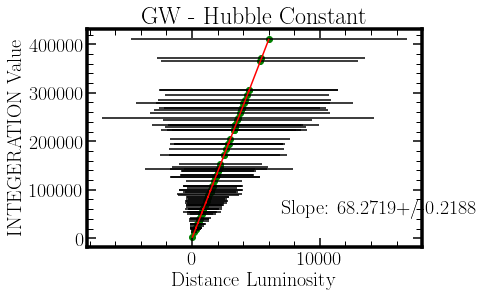

In [18]:
a=0
c=finalevents.size
INTGW=np.zeros(c)
def func(x,m):
    return x/m
for redshift in sort_data_GW.Fin_Z_GW:
  g = quad(int_func,0,redshift)
  INTGW[a]+=(1+redshift)*g[0]*(300000) 
  a=a+1
for redshiftup in sort_data_GW.Fin_Z_GW:
  g = quad(int_func,0,redshift)
  INTGW[a]+=(1+redshift)*g[0]*(300000) 
  a=a+1
for redshift in sort_data_GW.Fin_Z_GW:
  g = quad(int_func,0,redshift)
  INTGW[a]+=(1+redshift)*g[0]*(300000) 
  a=a+1
popt, pcov=curve_fit(func,INTGW,sort_data_GW.Fin_dLdata_GW,sigma=sort_data_GW.Fin_DL_UpError)
p=format(popt[0],'.4f')
err=pcov[0]**.5
err1=format(err[0],'.4f')
f=popt*sort_data_GW.Fin_dLdata_GW
plt.xlabel("Distance Luminosity")
plt.ylabel("INTEGERATION Value")
plt.title("GW - Hubble Constant")
plt.scatter(sort_data_GW.Fin_dLdata_GW,INTGW,color='green')
plt.errorbar(sort_data_GW.Fin_dLdata_GW,INTGW,xerr=sort_data_GW.Fin_DL_UpError,fmt=' ',ecolor='black', label='error')
plt.plot(sort_data_GW.Fin_dLdata_GW,f,color='red')
plt.text(7000,50000,"Slope: "+str(p)+"+/-"+str(err1))
plt.show()

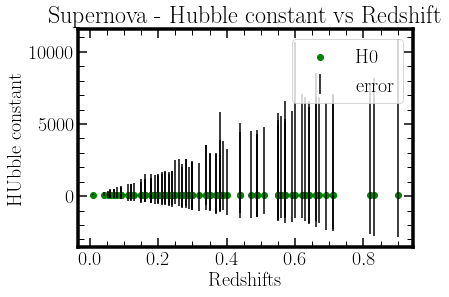

In [19]:
plt.xlabel("Redshifts")
plt.ylabel("HUbble constant")
plt.title("Supernova - Hubble constant vs Redshift")
plt.scatter(sort_data_GW.Fin_Z_GW,sort_data_GW.H0_GW,color='green',label='H0')
plt.errorbar(sort_data_GW.Fin_Z_GW,sort_data_GW.H0_GW,yerr=(sort_data_GW.Fin_DL_LowError,sort_data_GW.Fin_DL_UpError),fmt=' ',ecolor='black', label='error')
plt.legend(loc='best')
plt.show()

In [45]:
# Chi_square test considering only GW data points
chi_sq = []
collection=[]
nconf=np.zeros(15876)
omegconf=np.zeros(15876)
col=[]
dlth_GW= np.zeros(88)
dmth_GW= np.zeros(88)
chi_sq=np.zeros(88)
a=0
b=0
c=0
d=0
new_error=Fin_data_GW.Fin_DL_LowError
for H in np.linspace(50,100,1000):
    for redshift in Fin_data_GW.Fin_Z_GW:
      g = quad(int_func,0,redshift)
      dl1=(1+redshift)*g[0]*(300000/H)
      dlth_GW[b]+=dl1
      dmth_GW[a]+=5.*log(dl1,10)+25
      a+=1
      b+=1
      Fin_data_GW["DLchi"]=dlth_GW
    a=0
    b=0
    C2=0
    C1=0
    for i in new_error:
      C2+=1/np.power(i,2)
    Fin_data_GW["dC1"]=(Fin_data_GW["DLchi"]-Fin_data_GW["Fin_dLdata_GW"])/(new_error**2)
    for i in Fin_data_GW["dC1"]:
      C1+=i
    del Fin_data_GW["dC1"]
    chi_sq_part1 = 0
    Fin_data_GW["Part1"]=((Fin_data_GW["DLchi"]-Fin_data_GW["Fin_dLdata_GW"])/new_error)**2
    for i in Fin_data_GW.Part1:
      chi_sq_part1+=i
    del Fin_data_GW["Part1"]
    chi_sq = chi_sq_part1+(C1/C2)*(C1+(2*log(10)/5))-(2*log(0.698))
    col.append(chi_sq)
    collection.append([chi_sq,H])
    dlth_GW = np.zeros(88)
    del Fin_data_GW["DLchi"]
print(len(collection))
for i in collection:
  if i[0]==min(col):
    print(i)  

%time

1000
[-10.841252579228021, 86.73673673673673]
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs


In [9]:
!pip install paida

In [15]:
import paida

In [27]:
from paida import *
#from paida import paida_core
#import paida
#from paida_core.PAbsorber import *

analysisFactory = IAnalysisFactory.create()
treeFactory = analysisFactory.createTreeFactory()
tree = treeFactory.create()

### DataPointSet
dataPointSetFactory = analysisFactory.createDataPointSetFactory(tree)
dataPointSet1 = dataPointSetFactory.create('dataPointSet1', 'Symmetric', 2)
dataPointSet2 = dataPointSetFactory.create('dataPointSet2', 'Asymmetric', 2)

### Fill
import random
r = random.Random()
for i in range(30):
	error1 = r.randrange(-10.0, 10.0)
	error2 = r.random() * 10.0
	### Symmetric
	dataPoint = dataPointSet1.addPoint()
	dataPoint.coordinate(0).setValue(i)
	dataPoint.coordinate(1).setValue(2.0 * i + error1)
	dataPoint.coordinate(1).setErrorPlus(error2)
	dataPoint.coordinate(1).setErrorMinus(error2)
	### Asymmetric
	dataPoint = dataPointSet2.addPoint()
	dataPoint.coordinate(0).setValue(i)
	dataPoint.coordinate(1).setValue(2.0 * i + error1)
	dataPoint.coordinate(1).setErrorPlus(error2)
	dataPoint.coordinate(1).setErrorMinus(error2 / 2.0)

### Fit
fitFactory = analysisFactory.createFitFactory()
fitter = fitFactory.createFitter()
fitResult1 = fitter.fit(dataPointSet1, 'P1')
print ('### Symmetric: p0 + p1 * x')
print ('Parameter:', fitResult1.fittedParameters())
print ('Error    :', fitResult1.errors())
fitResult2 = fitter.fit(dataPointSet2, 'P1')
print ('### Asymmetric:  p0 + p1 * x')
print ('Parameter:', fitResult2.fittedParameters())
print ('Error    :', fitResult2.errors())

### Plot
plotterFactory = analysisFactory.createPlotterFactory()
plotter = plotterFactory.create('PAIDA Plotter')
plotter.createRegions(1, 2)

plotter.region(0).setTitle('Symmetric')
plotter.region(0).style().setParameter('showTitle', 'true')
plotter.region(0).style().dataStyle().setParameter('showErrorBars', 'True')
plotter.region(0).plot(dataPointSet1)
plotter.region(0).plot(fitResult1.fittedFunction())

plotter.region(1).setTitle('Asymmetric')
plotter.region(1).style().setParameter('showTitle', 'true')
plotter.region(1).style().dataStyle().setParameter('showErrorBars', 'True')
plotter.region(1).plot(dataPointSet2)
plotter.region(1).plot(fitResult2.fittedFunction())

### Wait.
dummy = raw_input('Hit any key.')



SyntaxError: invalid syntax (IFitter.py, line 379)